In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx import to_numpy_matrix
import matplotlib.pyplot as plt

In [2]:
# 数据加载
G = nx.read_gml('../data/dolphins/dolphins.gml')

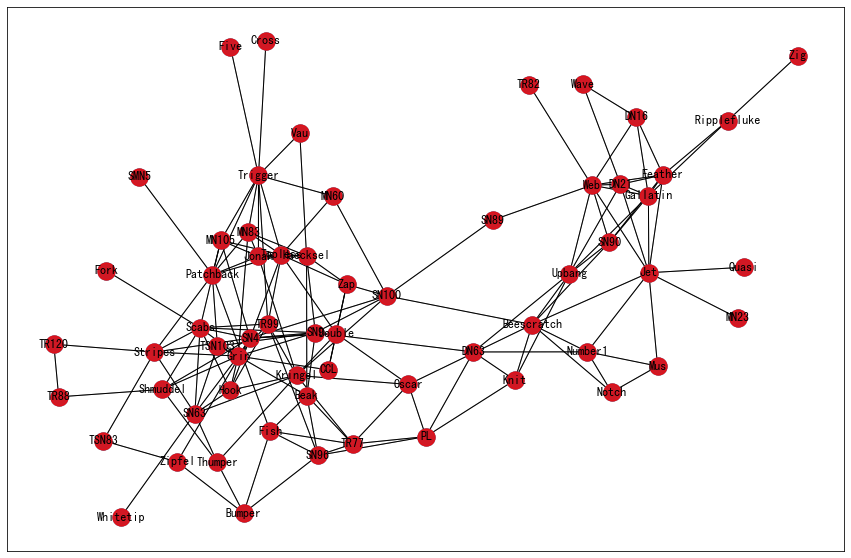

In [3]:
# 对网络进行可视化
def plot_graph(G):
    plt.figure(figsize=(15,10))
    pos = nx.spring_layout(G)
    edges = G.edges()
    nx.draw_networkx(G, pos, edges=edges)
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(),
                           node_size=300, node_color='r', alpha=0.8)
    nx.draw_networkx_edges(G, pos, edgelist=edges, alpha=0.4)
    plt.show()


plot_graph(G)

In [4]:
# 构建GCN,计算A_hat,D_hat矩阵
order = sorted(list(G.nodes()))
# 邻接矩阵
A = to_numpy_matrix(G,nodelist=order)
# print('A=',A)

# 生成对角矩阵
I = np.eye(G.number_of_nodes())
A_hat = A + I

# D_hat为A_hat的度矩阵
D_hat = np.array(np.sum(A_hat,axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

In [5]:
def relu(x):
    return (abs(x) + x)/2

# 叠加GCN层，这里只使用单位矩阵作为特征表征，即每个节点被表示为一个 one-hot 编码的类别变量


def gcn_layer(A_hat, D_hat, X, W, activation=None):
    if activation:
        return activation(D_hat**-1 * A_hat * X * W)
    else:
        return D_hat**-1 * A_hat * X * W

# 不同节点value，绘制不同的颜色


def getValue(value):
    colorList = ['blue', 'green', 'purple', 'yellow', 'red',
                 'pink', 'orange', 'black', 'white', 'gray', 'brown', 'wheat']
    return colorList[int(value) % len(colorList)]


# 绘制output，节点GCN embedding可视化
def plot_node(output, title):
    plt.figure(figsize=(15, 10))
    for i in range(len(nodes)):
        node_name = nodes[i]
        value = i
        plt.scatter(np.array(output)[i, 0], np.array(output)[
                    i, 1], label=str(i), color=getValue(value), alpha=0.5, s=250)
        plt.text(np.array(output)[i, 0], np.array(output)[
                 i, 1], i, horizontalalignment='center', verticalalignment='center', fontdict={'color': 'black'})
    plt.title(title)
    plt.show()

In [6]:
# 初始化权重,normal 正态分布 loc为均值,scale 标准差
W_1 = np.random.normal(loc=0,scale=1,size=(G.number_of_nodes(),4))
W_2 = np.random.normal(loc=0,size=(W_1.shape[1],2))

output=
 [[0.00000000e+00 1.76128243e-01]
 [0.00000000e+00 9.50849708e-03]
 [0.00000000e+00 1.37939093e-01]
 [0.00000000e+00 6.64252384e-01]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.80985943e-01]
 [0.00000000e+00 4.15741838e-01]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.80876942e-01]
 [0.00000000e+00 8.85399148e-01]
 [0.00000000e+00 2.38357793e-01]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.49338089e-01]
 [0.00000000e+00 1.56351361e-01]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.13287211e-02]
 [0.00000000e+00 4.62879291e-01]
 [0.00000000e+00 5.12726206e-02]
 [0.00000000e+00 2.73964062e-04]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.23896450e-02]
 [0.00000000e+00 6.92966125e-02]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.42783290e-01]
 [0.00000000e+00 6.59229036e-01]
 

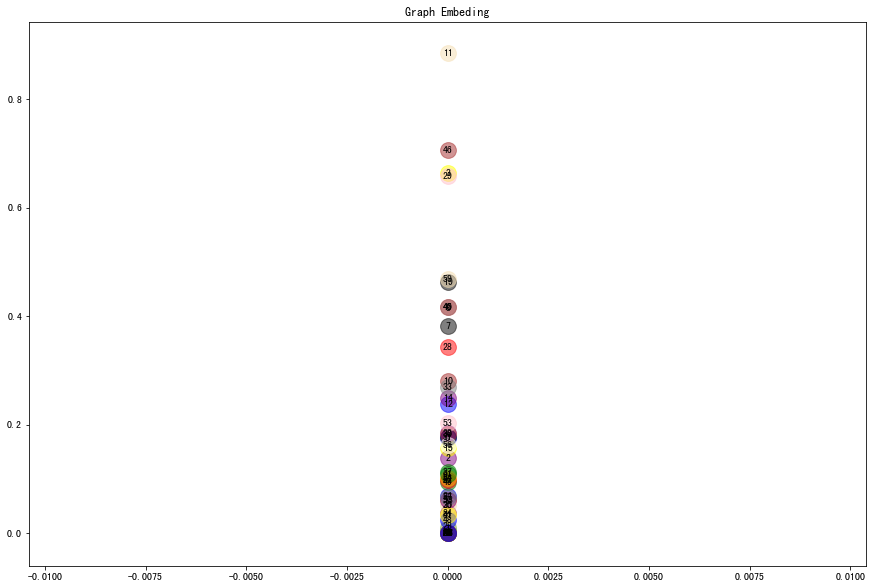

In [7]:
H_1 = gcn_layer(A_hat,D_hat,I,W_1,activation=relu)
H_2 = gcn_layer(A_hat,D_hat,H_1,W_2,activation=relu)
output = H_2
print('output=\n',output)
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i,node in enumerate(nodes):
    feature_representations[node] = np.array(output)[i]
print('feature_representations=\n',feature_representations)

plot_node(output,'Graph Embeding')

feature_representations=
 {'Beak': array([ 0.23351215, -0.33129348]), 'Beescratch': array([-0.0009268 , -0.54704289]), 'Bumper': array([ 0.31571004, -0.61724182]), 'CCL': array([-0.0893884 ,  0.20323731]), 'Cross': array([ 0.69177063, -2.74187984]), 'DN16': array([-0.10741407, -1.30960018]), 'DN21': array([-0.06404821, -1.1648143 ]), 'DN63': array([0.05728008, 0.00823232]), 'Double': array([ 0.09023379, -0.27703189]), 'Feather': array([-0.05660201, -1.26196335]), 'Fish': array([ 0.30327745, -0.23088628]), 'Five': array([-0.10540198, -0.45550859]), 'Fork': array([-0.01897308, -0.58693535]), 'Gallatin': array([-0.05565323, -1.23315385]), 'Grin': array([ 0.11459782, -0.28747177]), 'Haecksel': array([ 0.43723478, -1.00099422]), 'Hook': array([ 0.23608333, -0.83993485]), 'Jet': array([ 0.29216714, -1.19019707]), 'Jonah': array([ 0.57342655, -1.65176141]), 'Knit': array([-0.0579235 ,  0.32262105]), 'Kringel': array([ 0.24465339, -0.73762629]), 'MN105': array([ 0.53984512, -1.578483  ]), 'MN2

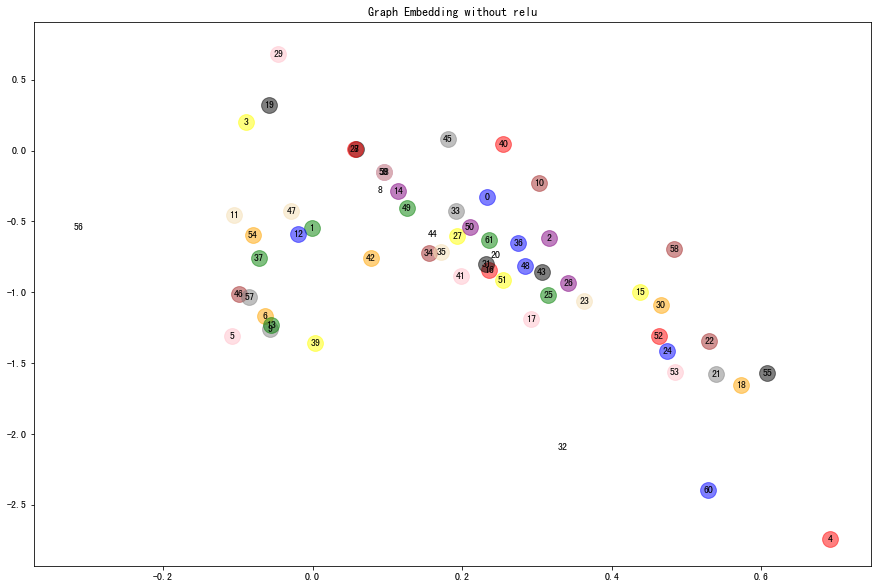

In [8]:
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2

# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
    feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations=\n', feature_representations)

print("output(去掉relu)=\n:", output)

plot_node(output, 'Graph Embedding without relu')